In [2]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [3]:
data_dir = 'mini-imagenet-img'

# Load the dataset
train_dataset = image_dataset_from_directory(
    os.path.join(data_dir, 'train'),
    image_size=(84, 84),
    batch_size=50,
    label_mode='categorical'
)
val_dataset = image_dataset_from_directory(
    os.path.join(data_dir, 'valid'),
    image_size=(84, 84),
    batch_size=50,
    label_mode='categorical'
)

Found 6400 files belonging to 64 classes.
Metal device set to: Apple M2

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 1920 files belonging to 64 classes.


In [4]:
def preprocess(images, labels):
    images = preprocess_input(images)
    return images, labels

train_dataset = train_dataset.map(preprocess)
val_dataset = val_dataset.map(preprocess)

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(84, 84, 3))

x = GlobalAveragePooling2D()(vgg16_base.output)
x = Dense(1024, activation='relu')(x)
output = Dense(64, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
128/128 [==============================] - 50s 394ms/step - loss: 4.1596 - accuracy: 0.0139 - val_loss: 4.1589 - val_accuracy: 0.0156
Epoch 2/10
128/128 [==============================] - 50s 393ms/step - loss: 4.1596 - accuracy: 0.0130 - val_loss: 4.1589 - val_accuracy: 0.0156
Epoch 3/10
128/128 [==============================] - 50s 391ms/step - loss: 4.1595 - accuracy: 0.0119 - val_loss: 4.1589 - val_accuracy: 0.0156
Epoch 4/10
128/128 [==============================] - 50s 391ms/step - loss: 4.1595 - accuracy: 0.0119 - val_loss: 4.1589 - val_accuracy: 0.0156
Epoch 5/10
128/128 [==============================] - 50s 391ms/step - loss: 4.1595 - accuracy: 0.0122 - val_loss: 4.1589 - val_accuracy: 0.0156
Epoch 6/10
128/128 [==============================] - 50s 393ms/step - loss: 4.1594 - accuracy: 0.0123 - val_loss: 4.1589 - val_accuracy: 0.0156
Epoch 7/10
128/128 [==============================] - 50s 393ms/step - loss: 4.1594 - accuracy: 0.0122 - val_loss: 4.1589 - val_ac

In [ ]:
model.save('my_model.h5')

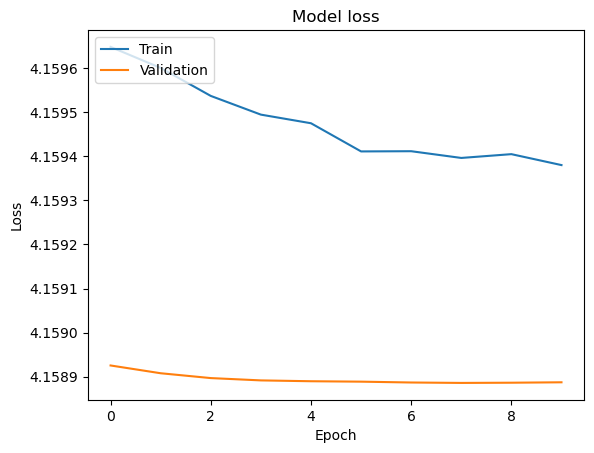

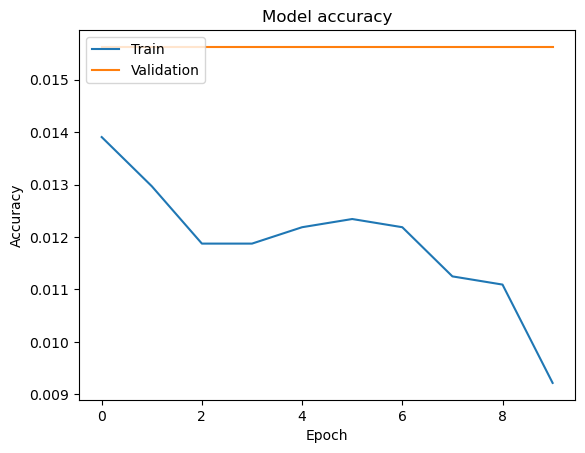

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()